In [23]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
df=pd.DataFrame(data=data)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

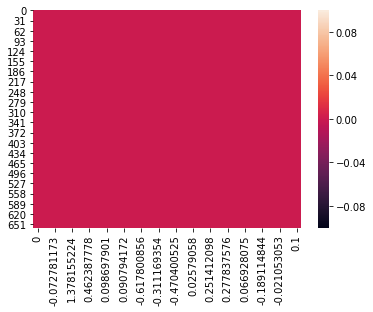

In [5]:
sns.heatmap(df.isnull())

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
#sns.pairplot(x[1:4])

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=46)

In [9]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9616252821670429

In [10]:
pred=lr.predict(x_test)

In [11]:
accuracy_score(y_test,pred)

0.9634703196347032

In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

   micro avg       0.96      0.96      0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
auc=roc_auc_score(y_test,pred)

In [14]:
auc

0.5

In [15]:
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [16]:
fpr

array([0., 1.])

In [17]:
tpr

array([0., 1.])

In [18]:
thresholds

array([1, 0], dtype=int64)

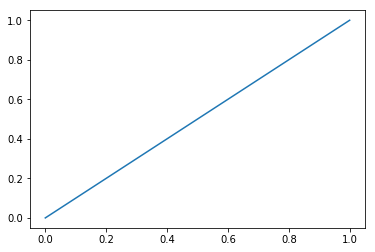

In [19]:
plt.plot(fpr,tpr,label="data,auc"+str(auc))

In [32]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
accuracy_score(y_test,preddtc)
auc=roc_auc_score(y_test,preddtc)
auc

0.5364336492890995

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()

In [36]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9864559819413092

In [37]:
predrf=rf.predict(x_test)
accuracy_score(y_test,predrf)


0.9634703196347032

In [39]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

   micro avg       0.96      0.96      0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219



In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc=GradientBoostingClassifier()

In [44]:
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)

1.0

In [45]:
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))

0.954337899543379


In [46]:
print(classification_report(y_test,predgbc))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       211
           1       0.25      0.12      0.17         8

   micro avg       0.95      0.95      0.95       219
   macro avg       0.61      0.56      0.57       219
weighted avg       0.94      0.95      0.95       219



In [47]:
!pip install xgboost

In [50]:
from xgboost import XGBClassifier

In [51]:
xgb=XGBClassifier()

In [52]:
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

1.0

In [53]:
predxg=xgb.predict(x_test)

In [54]:
accuracy_score(y_test,predxg)

0.9634703196347032

In [55]:
print(classification_report(y_test,predxg))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       211
           1       0.00      0.00      0.00         8

   micro avg       0.96      0.96      0.96       219
   macro avg       0.48      0.50      0.49       219
weighted avg       0.93      0.96      0.95       219



In [56]:
import pickle

In [57]:
saved_model=pickle.dumps(xgb)

In [58]:
xgb_from_pickle = pickle.loads(saved_model)

In [59]:
xgb_from_pickle.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [61]:
from sklearn.externals import joblib

In [64]:
joblib.dump(xgb,'exgboost')

['exgboost']

In [65]:
xgbjoblib=joblib.load('exgboost')

In [66]:
xgbjoblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)